50, 100, 200 Day MA stategier, på NOD.ol og OBX Technology

In [2]:
import pandas as pd

nordic = pd.read_csv(r"C:\pythonlek\8sem\norne-momentum-backtest\data\raw\Nordic Semiconductor Stock Price History.csv")
osb_tech = pd.read_csv(r"C:\pythonlek\8sem\norne-momentum-backtest\data\raw\OBX Technology NR Historical Data (1).csv")

nordic.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/26/2026,131.7,134.2,134.1,131.2,523.85K,-1.79%
1,01/23/2026,134.1,137.9,137.9,132.5,834.85K,-2.76%
2,01/22/2026,137.9,137.0,139.6,136.0,1.15M,2.60%
3,01/21/2026,134.4,133.8,135.8,130.3,857.08K,2.05%
4,01/20/2026,131.7,131.3,132.6,129.1,892.93K,-0.08%


Need to do preprocessing if you want to use the volume column(str -> float) but for price based strategies, dont bother

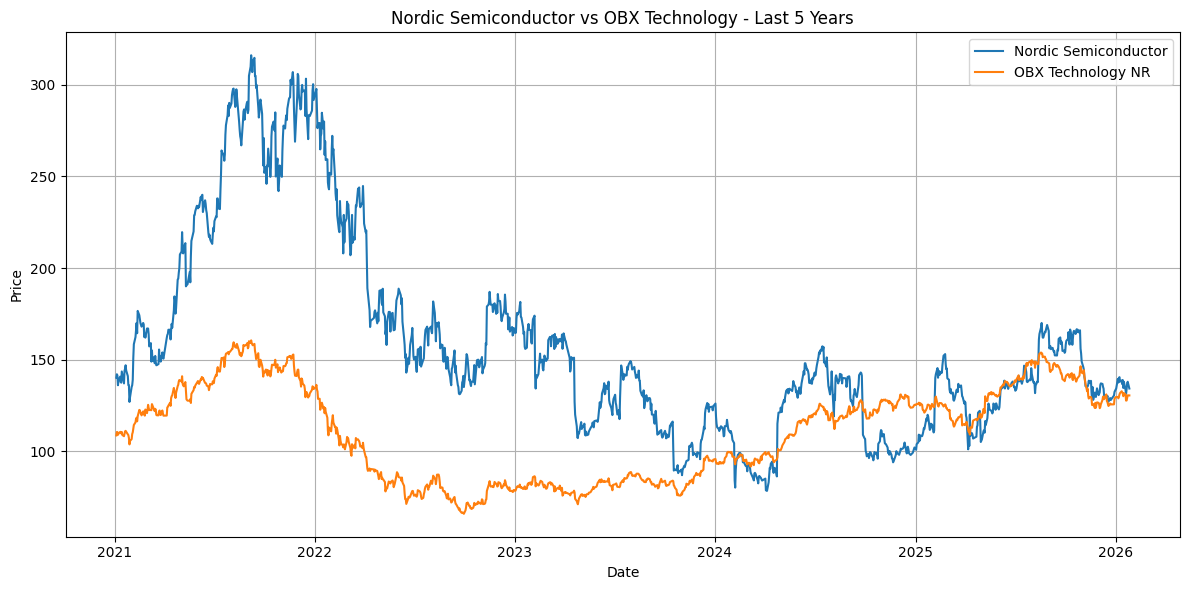

In [3]:
import matplotlib.pyplot as plt

# Convert Date columns to datetime
nordic['Date'] = pd.to_datetime(nordic['Date'])
osb_tech['Date'] = pd.to_datetime(osb_tech['Date'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(nordic['Date'], nordic["Open"], label='Nordic Semiconductor')
plt.plot(osb_tech['Date'], osb_tech['Open'], label='OBX Technology NR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Nordic Semiconductor vs OBX Technology - Last 5 Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Testing cummulative return of MA-crossover strategies on both

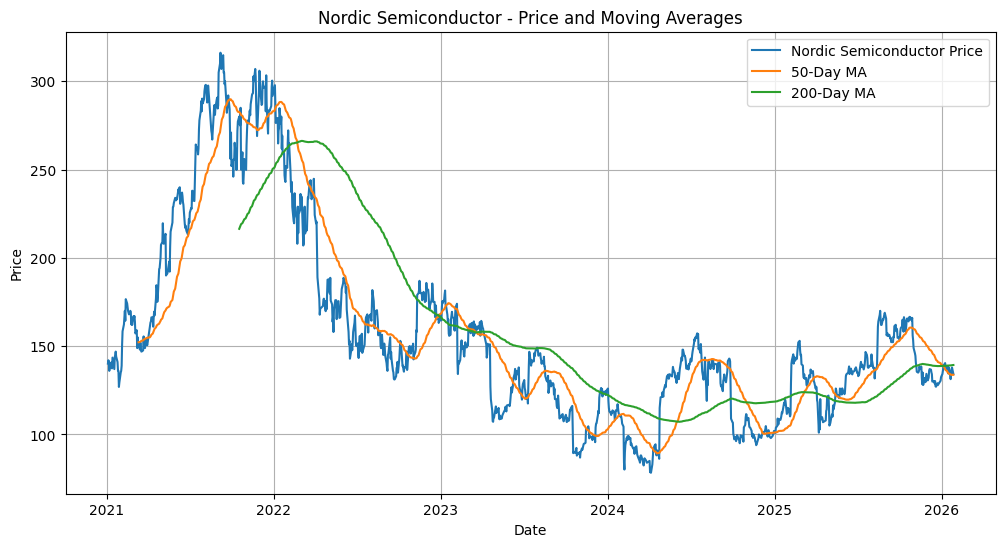

In [4]:
import numpy as np

moving_avg_1 = 50
moving_avg_2 = 200

# Sort by date to ensure correct rolling average calculation
nordic = nordic.sort_values('Date').reset_index(drop=True)
osb_tech = osb_tech.sort_values('Date').reset_index(drop=True)

nordic['MA50'] = nordic['Open'].rolling(window=moving_avg_1).mean()
nordic['MA200'] = nordic['Open'].rolling(window=moving_avg_2).mean()

plt.figure(figsize=(12, 6))
plt.plot(nordic['Date'], nordic['Open'], label='Nordic Semiconductor Price')
plt.plot(nordic['Date'], nordic['MA50'], label='50-Day MA')
plt.plot(nordic['Date'], nordic['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Nordic Semiconductor - Price and Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

test of golden cross/ death cross strategy for nordic


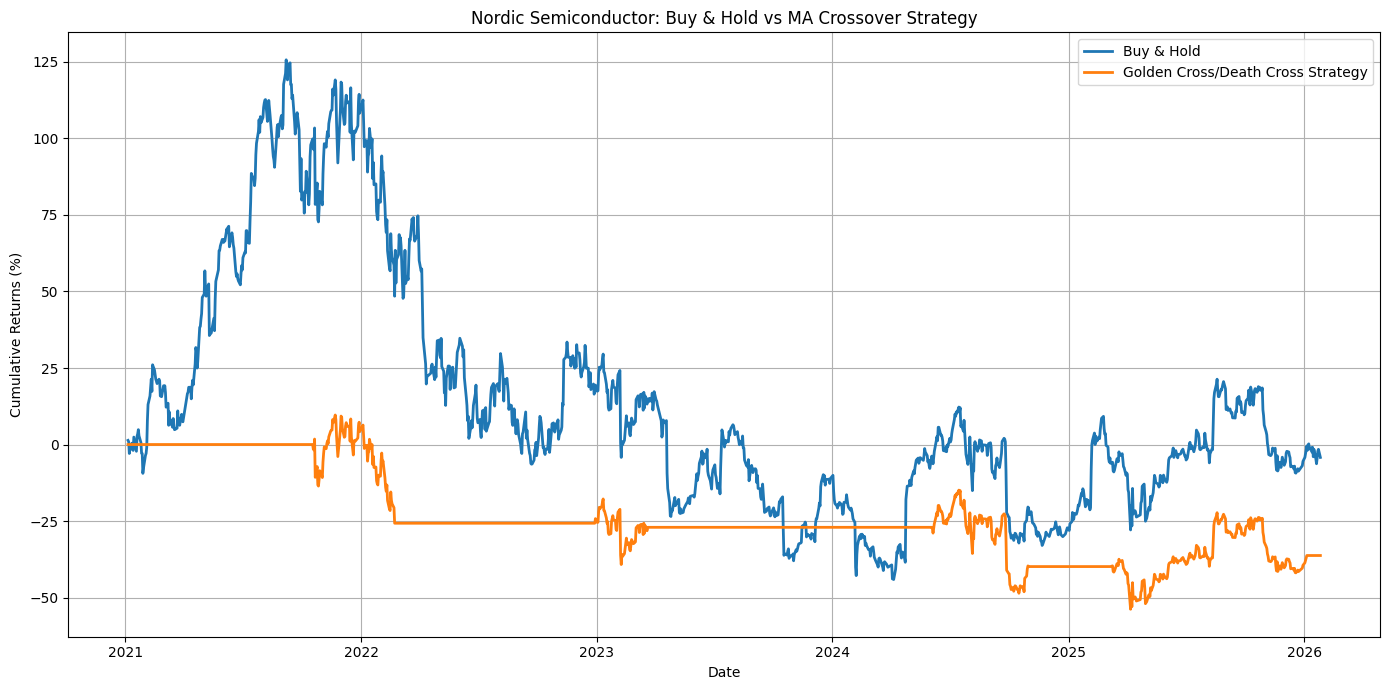

Buy & Hold Total Return: -4.21%
Strategy Total Return: -36.26%


In [5]:
# Generate signals: 1 when MA50 > MA200 (golden cross), 0 when MA50 < MA200 (death cross)
nordic['signal'] = np.where(nordic['MA50'] > nordic['MA200'], 1, 0)

# Start in long position (fill NaN values at the beginning with 1)
nordic['signal'] = nordic['signal'].fillna(1).astype(int)

# Generate position changes (when signal changes)
nordic['position_change'] = nordic['signal'].diff()

# Calculate daily returns
nordic['daily_returns'] = nordic['Open'].pct_change()

# Strategy returns: only hold position when signal is 1 (MA50 > MA200)
# Use signal without shift since we're already in position from start
nordic['strategy_returns'] = nordic['signal'].shift(1).fillna(1) * nordic['daily_returns']

# Calculate cumulative returns
nordic['buy_hold_cumulative'] = (1 + nordic['daily_returns']).cumprod() - 1
nordic['strategy_cumulative'] = (1 + nordic['strategy_returns']).cumprod() - 1

# Plot comparison
plt.figure(figsize=(14, 7))
plt.plot(nordic['Date'], nordic['buy_hold_cumulative'] * 100, label='Buy & Hold', linewidth=2)
plt.plot(nordic['Date'], nordic['strategy_cumulative'] * 100, label='Golden Cross/Death Cross Strategy', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.title('Nordic Semiconductor: Buy & Hold vs MA Crossover Strategy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"Buy & Hold Total Return: {nordic['buy_hold_cumulative'].iloc[-1]*100:.2f}%")
print(f"Strategy Total Return: {nordic['strategy_cumulative'].iloc[-1]*100:.2f}%")

illustration of when the strategy is in the market, and when not


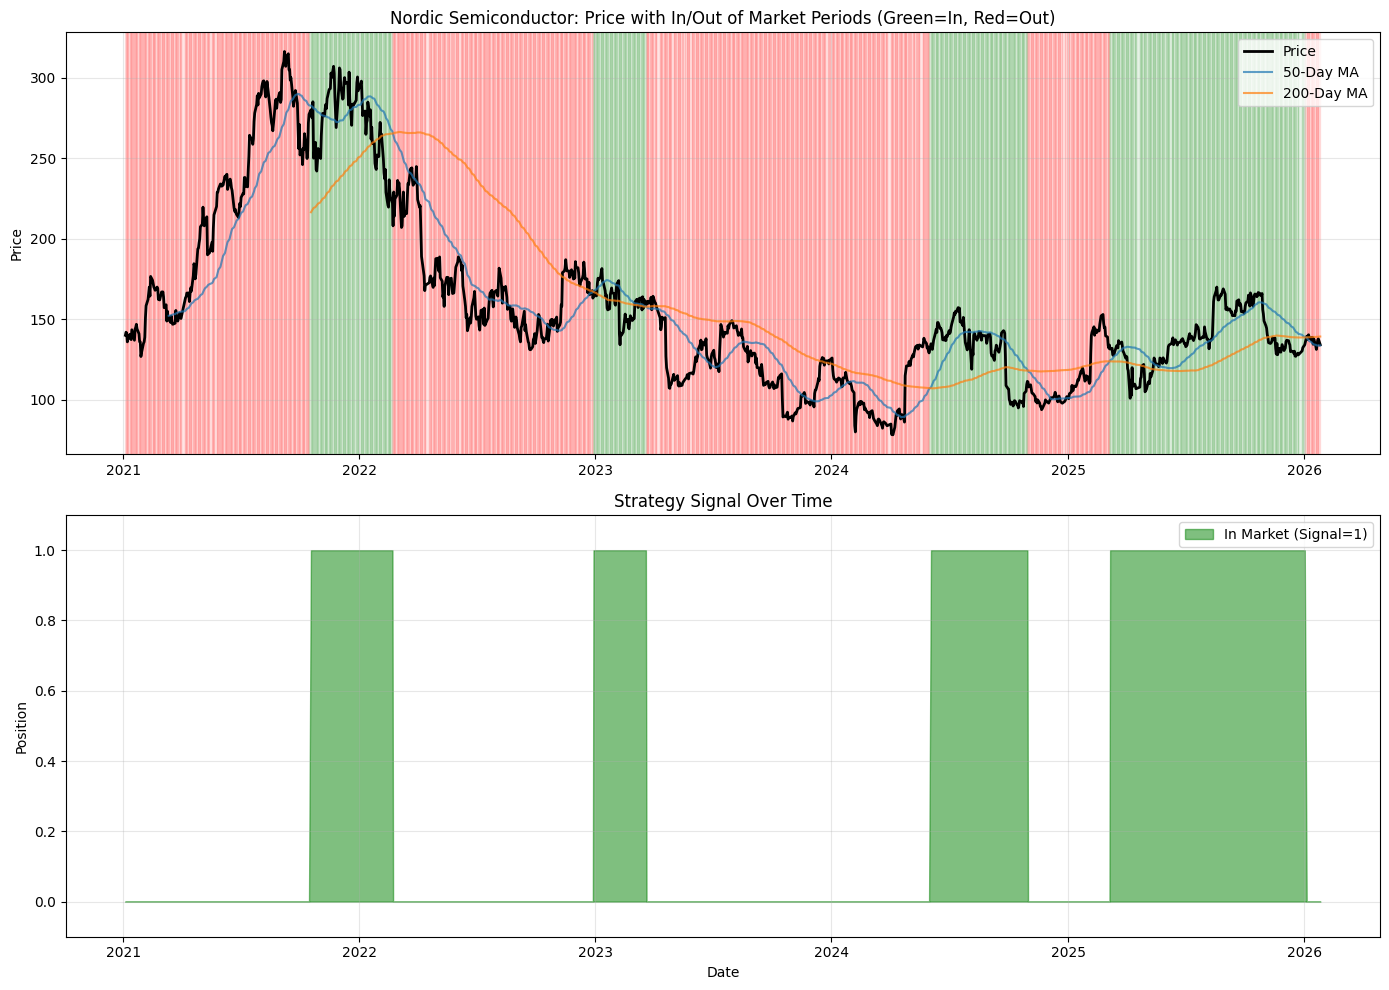


Time in market: 36.1%
Time out of market: 63.9%


In [6]:

# Visualize when strategy is in vs out of market
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Top plot: Price with MAs and signal background
ax1 = axes[0]
ax1.plot(nordic['Date'], nordic['Open'], label='Price', linewidth=2, color='black')
ax1.plot(nordic['Date'], nordic['MA50'], label='50-Day MA', linewidth=1.5, alpha=0.7)
ax1.plot(nordic['Date'], nordic['MA200'], label='200-Day MA', linewidth=1.5, alpha=0.7)

# Shade background based on signal (in market vs out)
for i in range(1, len(nordic)):
    if nordic['signal'].iloc[i] == 1:
        ax1.axvspan(nordic['Date'].iloc[i-1], nordic['Date'].iloc[i], alpha=0.1, color='green')
    else:
        ax1.axvspan(nordic['Date'].iloc[i-1], nordic['Date'].iloc[i], alpha=0.1, color='red')

ax1.set_ylabel('Price')
ax1.set_title('Nordic Semiconductor: Price with In/Out of Market Periods (Green=In, Red=Out)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bottom plot: Signal over time
ax2 = axes[1]
ax2.fill_between(nordic['Date'], 0, nordic['signal'], alpha=0.5, color='green', label='In Market (Signal=1)')
ax2.set_ylabel('Position')
ax2.set_xlabel('Date')
ax2.set_title('Strategy Signal Over Time')
ax2.set_ylim(-0.1, 1.1)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate time in/out of market
time_in_market = (nordic['signal'] == 1).sum() / len(nordic) * 100
print(f"\nTime in market: {time_in_market:.1f}%")
print(f"Time out of market: {100-time_in_market:.1f}%")

The same MA-crossover strategy (golden cross / death cross) for obx tech

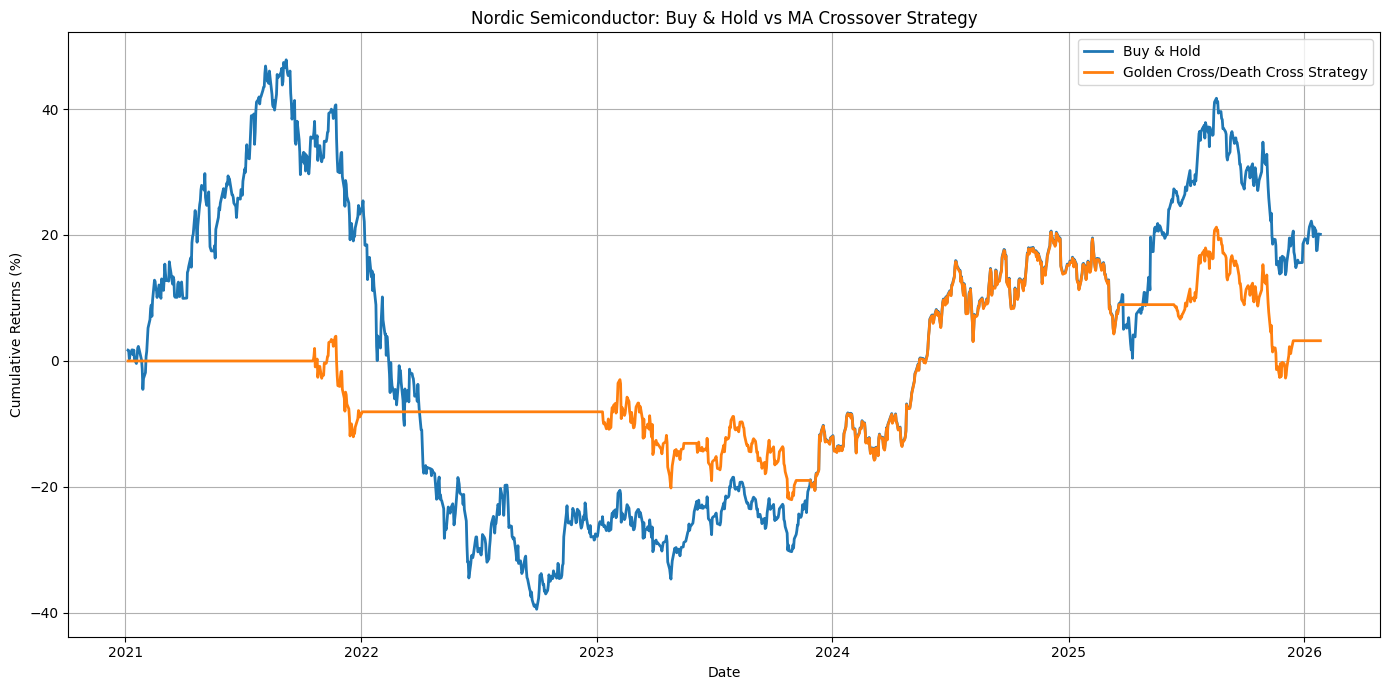

Buy & Hold Total Return: 20.11%
Strategy Total Return: 3.22%


In [8]:
#need to add the ma50 and ma200 to the df

osb_tech['MA50'] = osb_tech['Open'].rolling(window=moving_avg_1).mean()
osb_tech['MA200'] = osb_tech['Open'].rolling(window=moving_avg_2).mean()


# Generate signals: 1 when MA50 > MA200 (golden cross), 0 when MA50 < MA200 (death cross)
osb_tech['signal'] = np.where(osb_tech['MA50'] > osb_tech['MA200'], 1, 0)

# Start in long position (fill NaN values at the beginning with 1)
osb_tech['signal'] = osb_tech['signal'].fillna(1).astype(int)

# Generate position changes (when signal changes)
osb_tech['position_change'] = osb_tech['signal'].diff()

# Calculate daily returns
osb_tech['daily_returns'] = osb_tech['Open'].pct_change()

# Strategy returns: only hold position when signal is 1 (MA50 > MA200)
# Use signal without shift since we're already in position from start
osb_tech['strategy_returns'] = osb_tech['signal'].shift(1).fillna(1) * osb_tech['daily_returns']

# Calculate cumulative returns
osb_tech['buy_hold_cumulative'] = (1 + osb_tech['daily_returns']).cumprod() - 1
osb_tech['strategy_cumulative'] = (1 + osb_tech['strategy_returns']).cumprod() - 1

# Plot comparison
plt.figure(figsize=(14, 7))
plt.plot(osb_tech['Date'], osb_tech['buy_hold_cumulative'] * 100, label='Buy & Hold', linewidth=2)
plt.plot(osb_tech['Date'], osb_tech['strategy_cumulative'] * 100, label='Golden Cross/Death Cross Strategy', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.title('Nordic Semiconductor: Buy & Hold vs MA Crossover Strategy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"Buy & Hold Total Return: {osb_tech['buy_hold_cumulative'].iloc[-1]*100:.2f}%")
print(f"Strategy Total Return: {osb_tech['strategy_cumulative'].iloc[-1]*100:.2f}%")